In [1]:
import warnings
warnings.filterwarnings('ignore')

# Основные
import numpy as np 
import pandas as pd
from ydata_profiling import ProfileReport
import sqlite3
from sqlalchemy import create_engine

# Визуализация
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

import nltk

from wordcloud import WordCloud

import nbformat

# Статистика
from scipy import stats
from scipy.stats import norm

%matplotlib inline

In [2]:
df = pd.read_csv('ds_salaries.csv')
df.head()

work_year experience_level employment_type                 job_title   
0       2023               SE              FT  Principal Data Scientist  \
1       2023               MI              CT               ML Engineer   
2       2023               MI              CT               ML Engineer   
3       2023               SE              FT            Data Scientist   
4       2023               SE              FT            Data Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio   
0   80000             EUR          85847                 ES           100  \
1   30000             USD          30000                 US           100   
2   25500             USD          25500                 US           100   
3  175000             USD         175000                 CA           100   
4  120000             USD         120000                 CA           100   

  company_location company_size  
0               ES            L  
1               US            S  
2               US            S  
3               CA            M  
4               CA            M

In [3]:
df.shape

(3755, 11)

In [4]:
# Просмотр типа данных
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [5]:
# Проверка на пустые значения
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [6]:
#Проверка на дубликаты
duplicate_rows_data = df[df.duplicated()]
print(duplicate_rows_data.shape)

(1171, 11)


In [7]:
df = df.drop_duplicates()
df.shape

(2584, 11)

In [8]:
# Проверка уникальных значений
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} уникальных значений")

work_year: 4 уникальных значений
experience_level: 4 уникальных значений
employment_type: 4 уникальных значений
job_title: 93 уникальных значений
salary: 815 уникальных значений
salary_currency: 20 уникальных значений
salary_in_usd: 1035 уникальных значений
employee_residence: 78 уникальных значений
remote_ratio: 3 уникальных значений
company_location: 72 уникальных значений
company_size: 3 уникальных значений


In [9]:
# Наименование столбцов соответствует naming convention.
# Уточнение наименования значений данных.
df['experience_level'] = df['experience_level'].replace({
    'EN': 'Junior',
    'MI': 'Middle',
    'SE': 'Senior',
    'EX': 'Executive',
})

df['employment_type'] = df['employment_type'].replace({
    'FL': 'Freelancer',
    'CT': 'Contractor',
    'FT' : 'Full-time',
    'PT' : 'Part-time'
})

df['company_size'] = df['company_size'].replace({
    'S': 'SMALL',
    'M': 'MEDIUM',
    'L' : 'LARGE',
})
df['remote_ratio'] = df['remote_ratio'].astype(str)
df['remote_ratio'] = df['remote_ratio'].replace({
    '0': 'Office',
    '50': 'Half-Remote',
    '100' : 'Full-Remote',
})

In [10]:
df.job_title.unique()


array(['Principal Data Scientist', 'ML Engineer', 'Data Scientist',
       'Applied Scientist', 'Data Analyst', 'Data Modeler',
       'Research Engineer', 'Analytics Engineer',
       'Business Intelligence Engineer', 'Machine Learning Engineer',
       'Data Strategist', 'Data Engineer', 'Computer Vision Engineer',
       'Data Quality Analyst', 'Compliance Data Analyst',
       'Data Architect', 'Applied Machine Learning Engineer',
       'AI Developer', 'Research Scientist', 'Data Analytics Manager',
       'Business Data Analyst', 'Applied Data Scientist',
       'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer',
       'Head of Data', 'Data Science Manager', 'Data Manager',
       'Machine Learning Researcher', 'Big Data Engineer',
       'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer',
       'Director of Data Science', 'Machine Learning Scientist',
       'MLOps Engineer', 'AI Scientist', 'Autonomous Vehicle Technician',
       'Applied Machine Learning Sc

In [11]:
#Группировка профессий и удаление лишних колонок
def assign_broader_category(job_title):
    data_analyst = [
       'Data Analyst',
       'Data Quality Analyst',
       'Compliance Data Analyst',
       'Business Data Analyst',
       'Staff Data Analyst',
       'Financial Data Analyst',
       'BI Analyst',
       'Data Analytics Specialist',
       'BI Data Analyst',
       'Insight Analyst',
       'Product Data Analyst',
       'Data Analytics Consultant',
       'Data Operations Analyst',
       'Marketing Data Analyst',
       'Principal Data Analyst',
       'Finance Data Analyst'
       'Lead Data Analyst',
       'Data Analytics Lead'
    ]
    data_engineering = [
        'Analytics Engineer',
        'Research Engineer',
        'Business Intelligence Engineer',
        'Data Engineer',
        'Applied Machine Learning Engineer',
        'ETL Engineer',
        'Big Data Engineer',
        'BI Data Engineer',
        'Cloud Database Engineer',
        'Data Infrastructure Engineer',
        'Software Data Engineer',
        'Data Operations Engineer',
        'Deep Learning Engineer',
        'Azure Data Engineer',
        'Marketing Data Engineer',
        'Data Science Engineer',
        'Data Analytics Engineer',
        'Cloud Data Engineer',
        'Principal Data Engineer',
        'Lead Data Engineer'
        ]
    
    data_scientist = [
        'Principal Data Scientist',
        'Data Scientist',
        'Applied Scientist',
        'Research Scientist',
        'Applied Data Scientist',
        'Deep Learning Researcher',
        'Data Science Consultant',
        'Product Data Scientist',
        'Staff Data Scientist',
        'Lead Data Scientist',
        'Data Scientist Lead',
        'Data Science Tech Lead',
        'Data Science Lead'        
    ]
        
    machine_learning = [
        'ML Engineer',
        'Machine Learning Engineer',
        'Machine Learning Researcher',
        'Machine Learning Scientist',
        'MLOps Engineer',
        'Applied Machine Learning Scientist',
        'Machine Learning Infrastructure Engineer',
        'Machine Learning Software Engineer',
        'Machine Learning Research Engineer',
        'Machine Learning Developer',
        'Principal Machine Learning Engineer',
        'Lead Machine Learning Engineer'
    ]
    
    data_architecture = [
        'Data Architect',
        'Big Data Architect',
        'Principal Data Architect',
        'Cloud Data Architect'
    ]
    
    management = [
        'Data Analytics Manager',
        'Head of Data',
        'Data Science Manager',
        'Data Manager',
        'Director of Data Science',
        'Head of Data Science',
        'Data Lead',
        'Manager Data Management',
        'Data Management Specialist',
        'Machine Learning Manager',
        'Head of Machine Learning'
    ]
    
    if job_title in data_analyst:
        return "Data Analyst"
    elif job_title in data_engineering:
        return "Data Engineering"
    elif job_title in data_scientist:
        return "Data Science"
    elif job_title in machine_learning:
        return "Machine Learning"
    elif job_title in data_architecture:
        return "Data Architecture"
    elif job_title in management:
        return "Management"
    else:
        return "Other"

df['job_category'] = df['job_title'].apply(assign_broader_category)
df.insert(loc=0, column='id', value=(np.arange(1, 1 + len(df))))
df.drop(df[['salary','salary_currency']], axis = 1, inplace = True)

In [12]:
df.shape

(2584, 11)

In [13]:
profile = ProfileReport(df, title="Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
# Загрзука в БД SQLite
database_path = r'C:\sqlite\ds_salary'
engine = create_engine(f'sqlite:///{database_path}')
connection = engine.connect()
table_name = 'ds_salary'
df.to_sql(table_name, engine, if_exists='replace', index=False)

2584

In [15]:
# Закрываем соединение
connection.close()

Визуализация данных

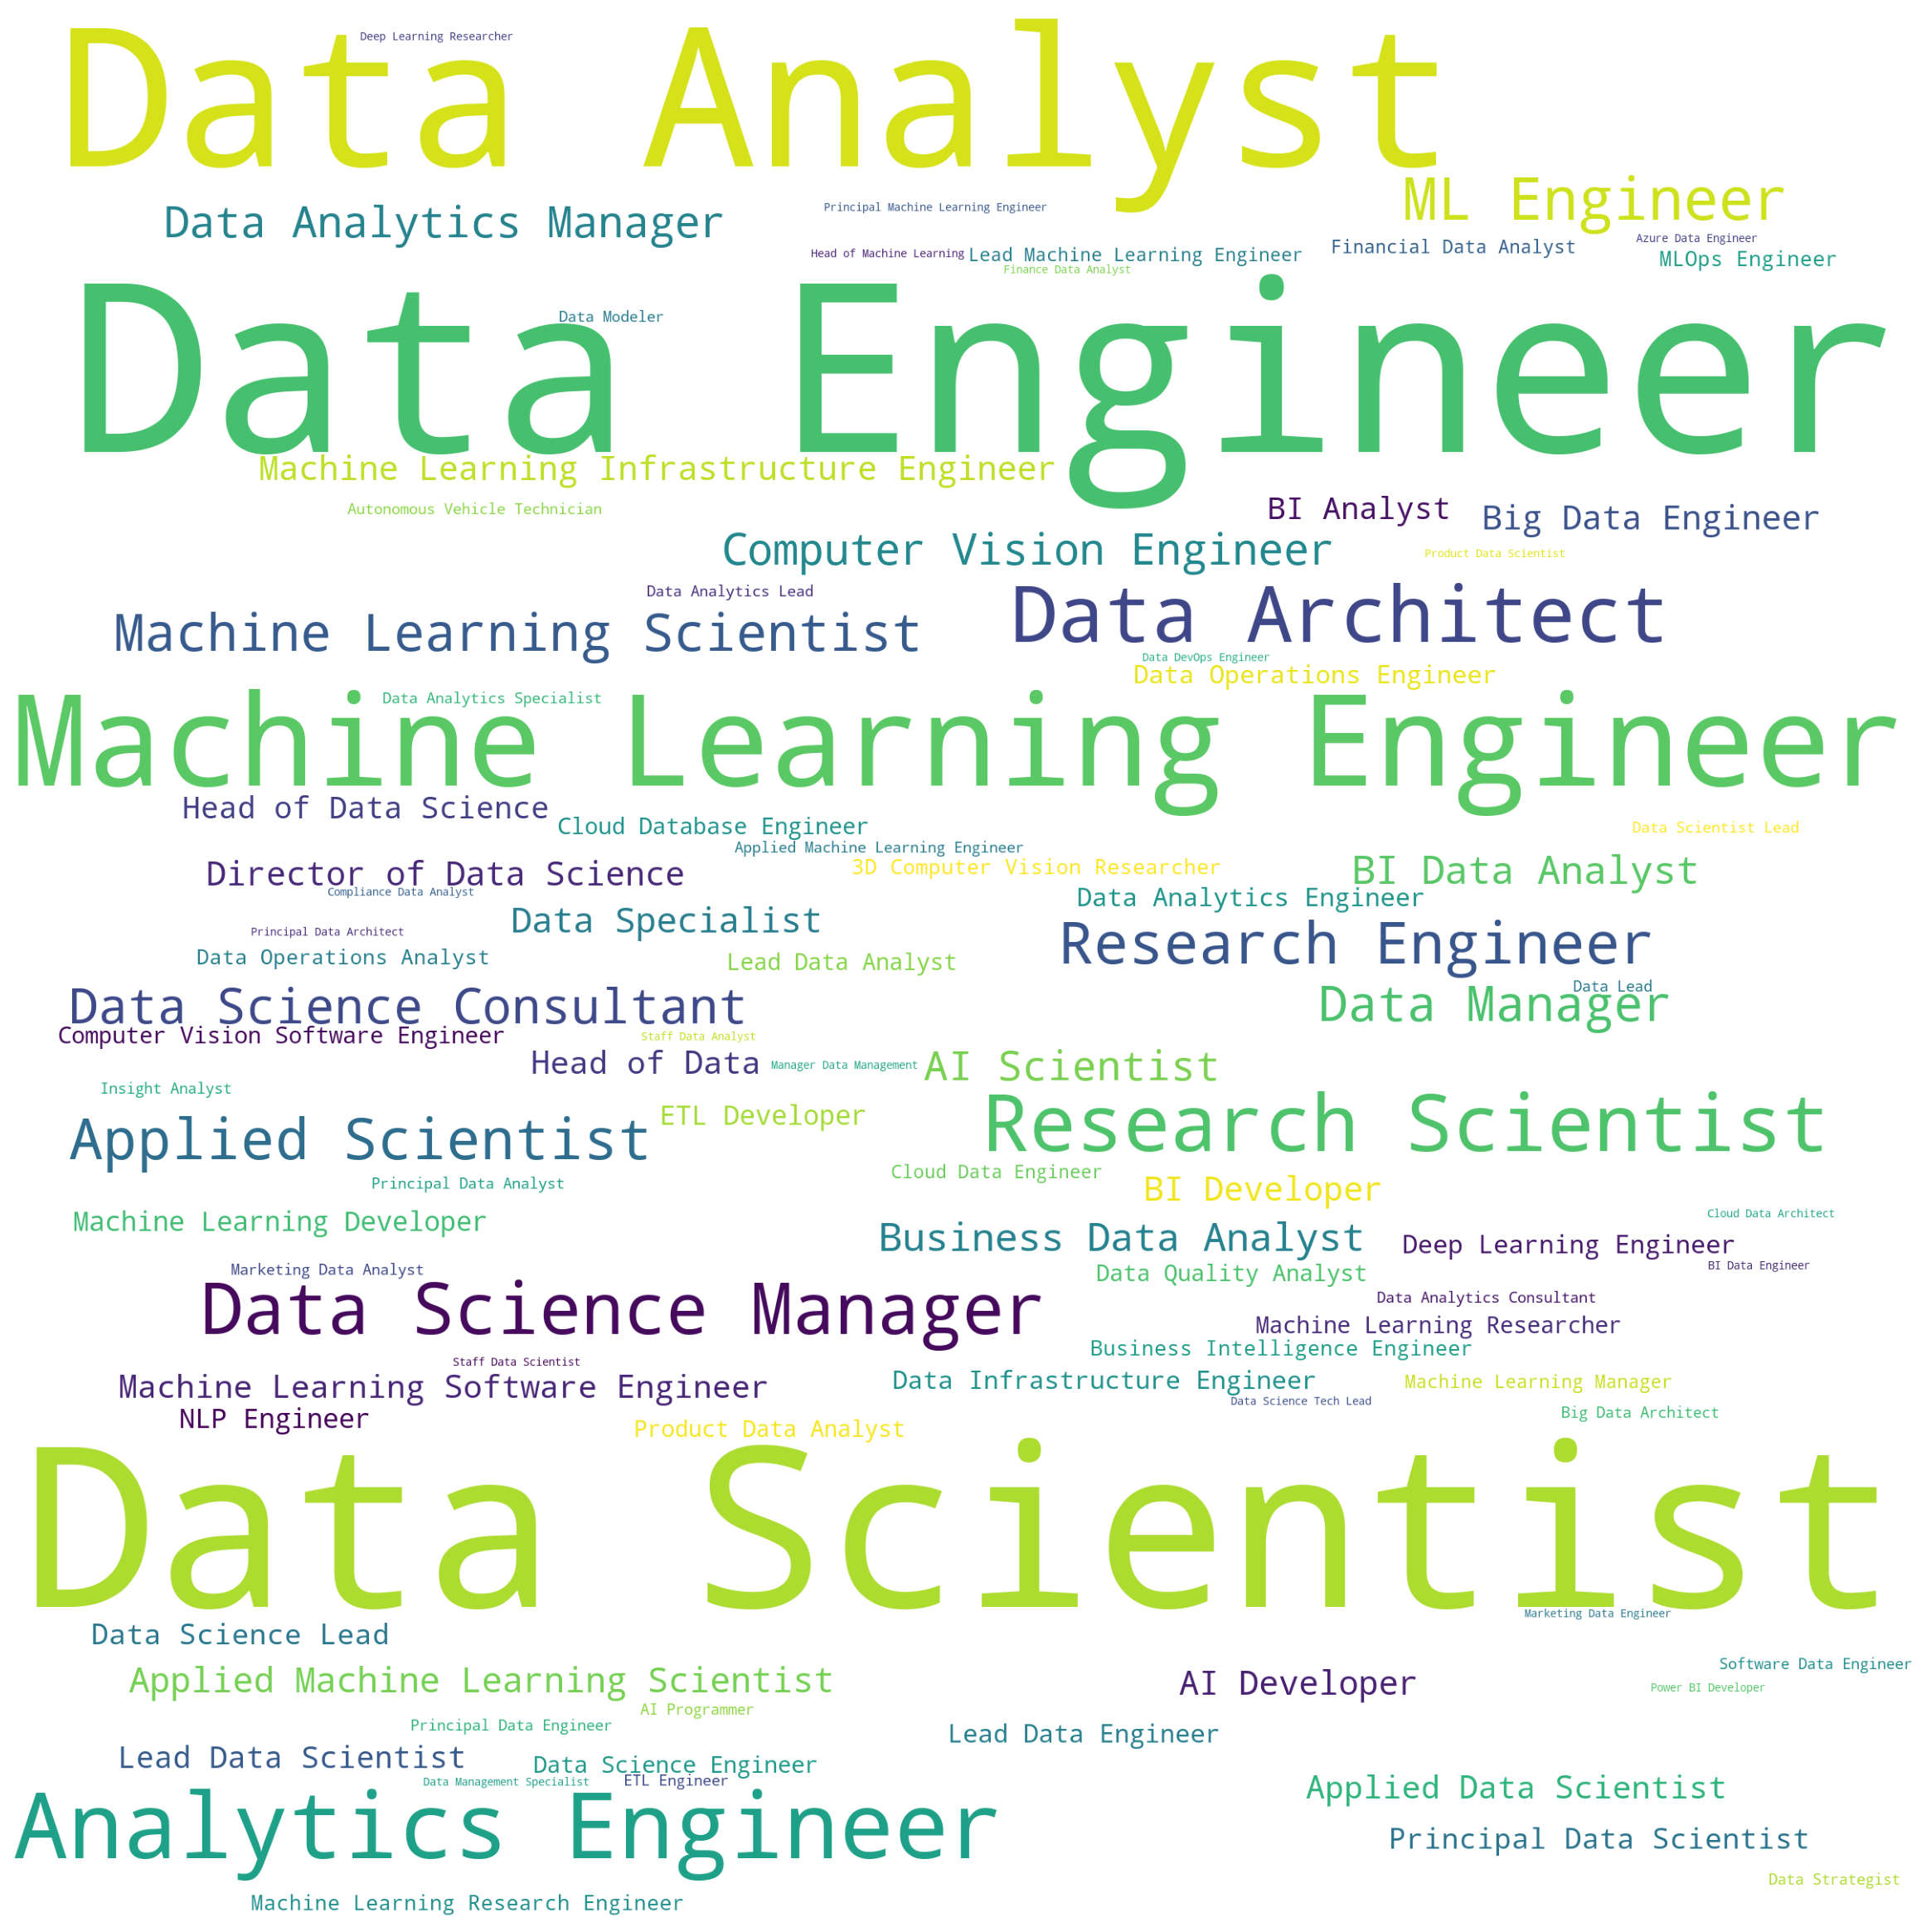

In [16]:
#WordCloud

def Freq_df(word_list):
    Freq_dist_nltk = nltk.FreqDist(word_list)
    df_freq = pd.DataFrame.from_dict(Freq_dist_nltk, orient = 'index')
    df_freq.columns = ['Frequency']
    df_freq.index.name = 'Term'
    df_freq = df_freq.sort_values(by = ['Frequency'], ascending = False)
    df_freq = df_freq.reset_index()
    return df_freq

def Word_Cloud(data, title):
    plt.figure(figsize = (40,30))
    wc = WordCloud(
        width = 2400, 
        height = 2400, 
        #max_words = 100,
        background_color = 'white',
        #min_font_size = 30,
        #max_font_size = 100
        prefer_horizontal = 1.5
        )
    wc.generate_from_frequencies(data)
    
    plt.imshow(wc)
    plt.title(title)
    plt.axis('off')
    plt.show()
    
freq_df = Freq_df(df['job_title'].values.tolist())
data = dict(zip(freq_df['Term'].tolist(), freq_df['Frequency'].tolist()))
data = freq_df.set_index('Term').to_dict()['Frequency']

Word_Cloud(data , '')

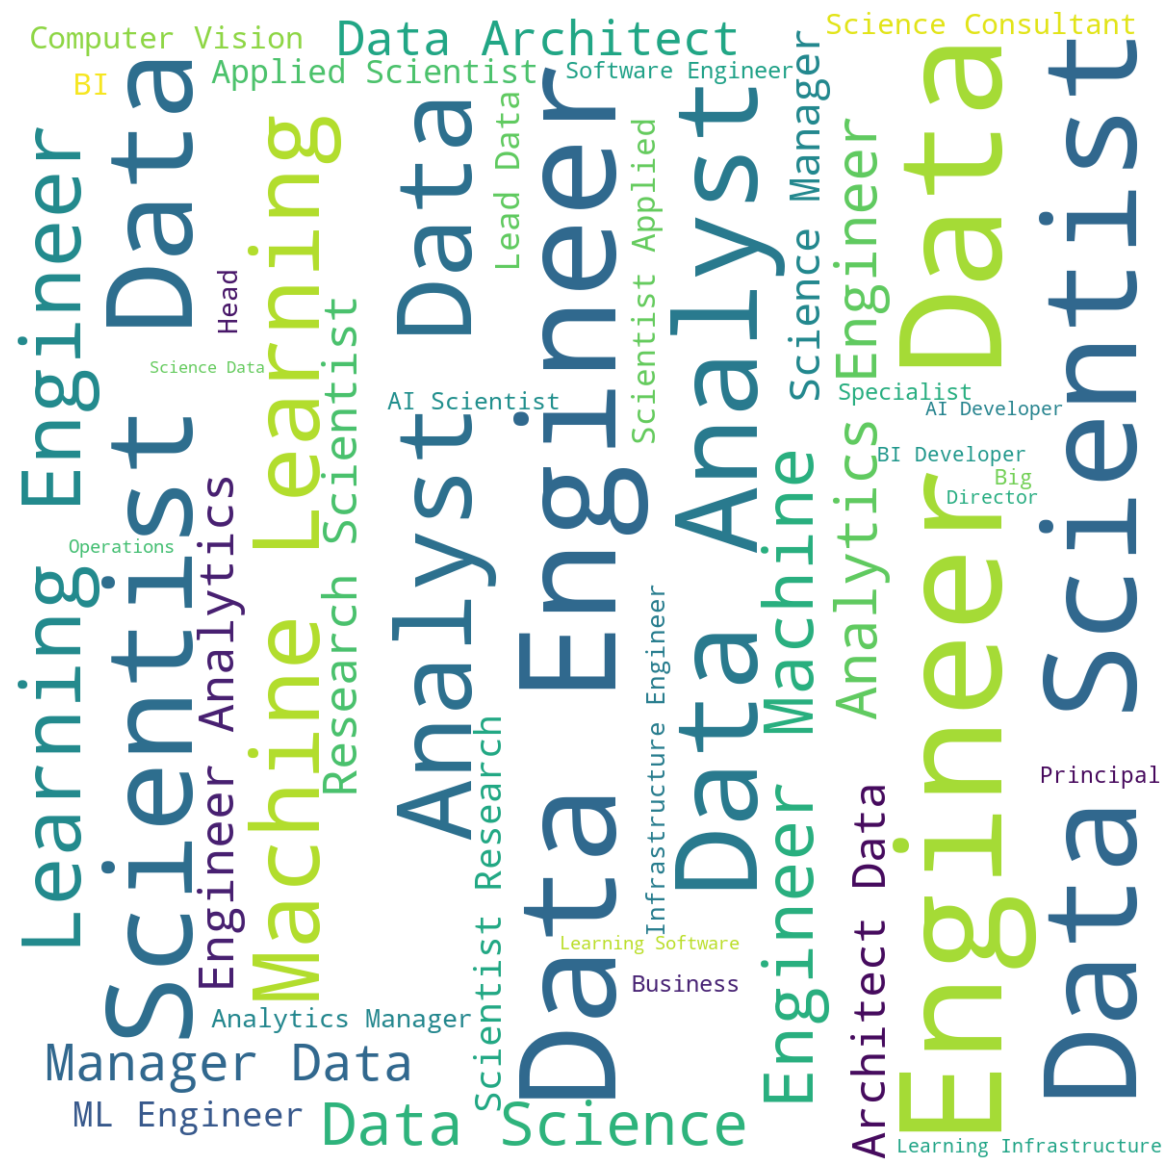

In [17]:
#Упрощенный WordCloud

dic = dict(df.job_title)
text = ' '.join(dic.values()) 
wordcloud = WordCloud(
    background_color="white",
    width = 1200, 
    height = 1200,
    min_font_size = 17,
    #max_words = 100,
    ).generate(text)
plt.figure(figsize = (20,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [18]:
#Подключение к БД
con = sqlite3.connect(r'C:\sqlite\ds_salary', timeout = 10)
cur = con.cursor()

In [19]:
#Считывание даннных
proc_exp_year_df = pd.read_sql(sql='select * from proc_exp_year', con=con)
proc_exp_year_df

work_year experience_level  count_exp_lvl  percentage
0        2020        Executive              3           4
1        2020           Junior             22          29
2        2020           Middle             32          42
3        2020           Senior             18          24
4        2021        Executive             10           4
5        2021           Junior             55          24
6        2021           Middle             90          39
7        2021           Senior             73          32
8        2022        Executive             39           3
9        2022           Junior            110           9
10       2022           Middle            288          25
11       2022           Senior            688          61
12       2023        Executive             44           3
13       2023           Junior             83           7
14       2023           Middle            254          21
15       2023           Senior            775          67

In [20]:
# Treemap-1
fig = px.treemap(proc_exp_year_df, 
                 path=[px.Constant("Процентное соотношение уровня опыта по годам"), "work_year", 'experience_level'], 
                 values='count_exp_lvl',
                 color='percentage', 
                 color_continuous_scale='RdBu',
                 width = 900,
                 height = 1000
                 )
fig.update_traces(marker=dict(cornerradius=5))
fig.show()

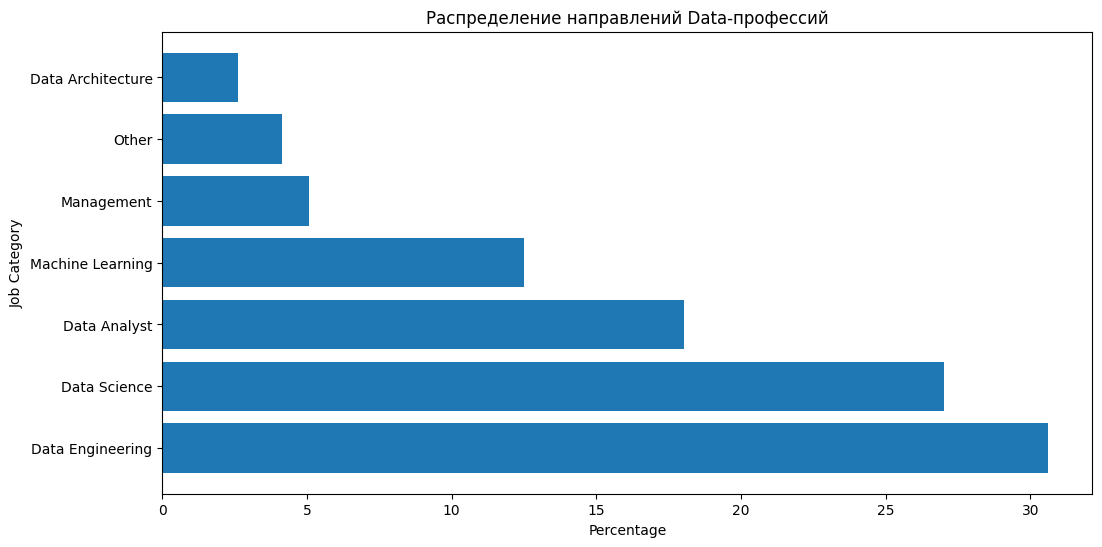

In [21]:
# Bar-1
value_counts = df['job_category'].value_counts(normalize=True) * 100

fig, ax = plt.subplots(figsize=(12, 6))
top_n = min(17, len(value_counts))
ax.barh(value_counts.index[:top_n], value_counts.values[:top_n])
ax.set_xlabel('Percentage')
ax.set_ylabel('Job Category')
ax.set_title('Распределение направлений Data-профессий')
plt.show()

In [22]:
# Bar-2
top15_job_titles = df['job_title'].value_counts()[:15]
fig = px.bar(top15_job_titles,
             y = top15_job_titles.values, 
             x = top15_job_titles.index, 
             text = top15_job_titles.values, 
             width  = 1000,
             height = 500,
             title = 'Тенденции в Data-профессиях')
fig.update_layout(xaxis_title = "Наименование профессий", yaxis_title = "Количество")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

In [23]:
# Bar-3
top_jt_df = pd.read_sql(sql='select * from top_jt', con=con)
fig = px.bar(x = top_jt_df['job_title'], y = top_jt_df['COUNT(job_title)'], 
            text = top_jt_df['COUNT(job_title)'], title = 'Top 15 Job Designations')
fig.update_layout(xaxis_title = "Job Designations", yaxis_title = "Count")
fig.show()

In [24]:
# Pie-1
fig = px.pie(names = top_jt_df['job_title'], 
             values = top_jt_df['COUNT(job_title)'], 
             title = 'Top 15 Data-профессий',
             
             hole  = 0.3,
             width = 900,
             height = 900
             )
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [25]:
# Sunvurst-1
cat_title_2_df = pd.read_sql(sql='select * from cat_title_2', con=con)
fig = px.sunburst(cat_title_2_df, 
                  path=['job_category', 'job_title'], 
                  values='COUNT(job_title)',
                  width = 1000,
                  height = 1000
                 )

fig.update_layout(
    margin = dict(t=10, l=10, r=10, b=10)
)
fig.update_traces(insidetextorientation='radial')
fig.show()

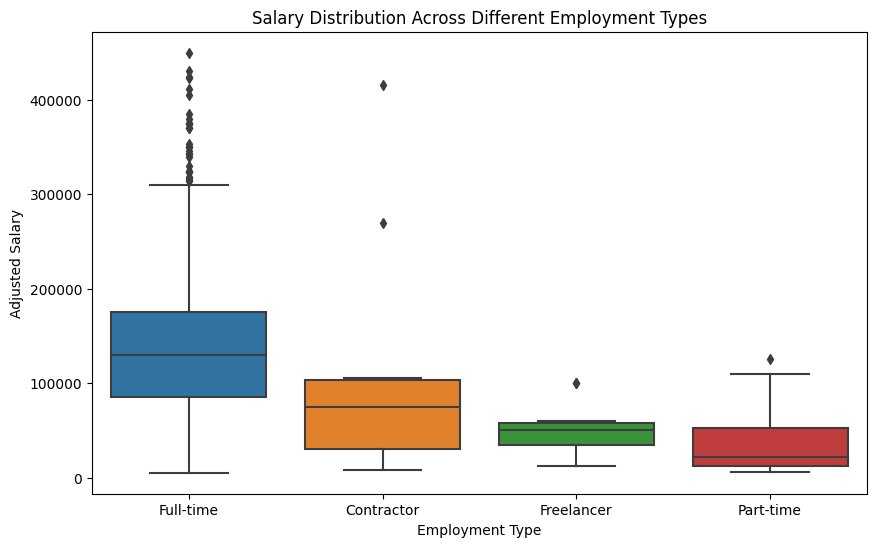

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(df, x='employment_type', y='salary_in_usd')
plt.title('Salary Distribution Across Different Employment Types')
plt.xlabel('Employment Type')
plt.ylabel('Adjusted Salary')
plt.show()

salary_in_usd: mu = 133409.28, sigma = 67123.85
salary_in_usd: Skewness: 0.62
salary_in_usd: Kurtosis: 0.83


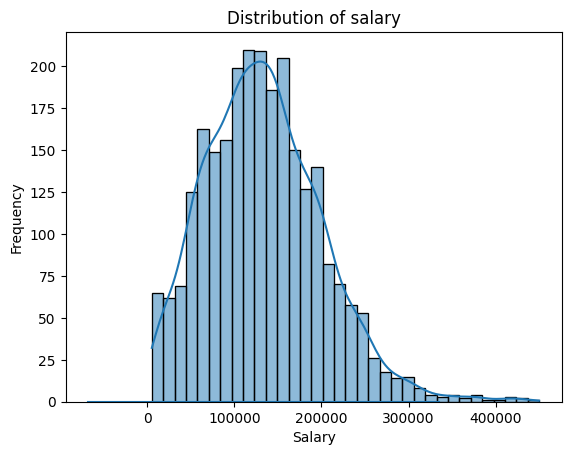

In [27]:
# Распределение з/п
columns = ['salary_in_usd']

for col in columns:
    # График распределения
    sns.histplot(df[col], kde=True)

    # Нормальное распредление к данным
    (mu, sigma) = stats.norm.fit(df[col])
    print('{}: mu = {:.2f}, sigma = {:.2f}'.format(col, mu, sigma))

    # Ассиметрия и эксцесс
    print('{}: Skewness: {:.2f}'.format(col, df[col].skew()))
    print('{}: Kurtosis: {:.2f}'.format(col, df[col].kurt()))

    # Добавляем нормальное распределение на график
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    y = stats.norm.pdf(x, mu, sigma)
    plt.plot(x, y, label='Normal fit')

    # Заголок, наименование осей
    plt.xlabel('Salary')
    plt.ylabel('Frequency')
    plt.title('Distribution of salary')

    plt.show()

In [28]:
# Plotbox-1
fig = px.box(y = df['salary_in_usd'], 
             title = 'Диаграмма размаха заработной платы',
             notched=True,
             width = 500,
             height = 500)
fig.update_layout(yaxis_title = "")
fig.show()

In [29]:
# Plotbox - 2
fig = px.box(df,
             x = 'job_category',
             y = 'salary_in_usd', 
             title = 'Диаграмма размаха з/п по категориям Data-профессий',
             color = 'job_category',
             width = 1100,
             height = 500
             )
fig.update_layout(xaxis_title = "Направления Data-профессий", yaxis_title = "Зарплата")
fig.show()

In [30]:
remote_year = df.groupby(['work_year','remote_ratio']).size()
ratio_2020 = np.round(remote_year[2020].values/remote_year[2020].values.sum(),2)
ratio_2021 = np.round(remote_year[2021].values/remote_year[2021].values.sum(),2)
ratio_2022 = np.round(remote_year[2022].values/remote_year[2022].values.sum(),2)
ratio_2023 = np.round(remote_year[2023].values/remote_year[2023].values.sum(),2)

fig = go.Figure()
categories = ['Full-Remote', 'Partially Remote', 'Office']
fig.add_trace(go.Scatterpolar(
            r = ratio_2020, theta = categories, 
            fill = 'toself', name = '2020 remote ratio'))

fig.add_trace(go.Scatterpolar(
            r = ratio_2021, theta = categories,
            fill = 'toself', name = '2021 remote ratio'))

fig.add_trace(go.Scatterpolar(
            r = ratio_2022, theta = categories,
            fill = 'toself', name = '2022 remote ratio'))

fig.add_trace(go.Scatterpolar(
            r = ratio_2023, theta = categories,
            fill = 'toself', name = '2023 remote ratio'))

fig.show()


In [39]:
# Введем переменные
categorical_columns = ['experience_level', 'employment_type', 'remote_ratio','company_size','job_category']
numerical_columns = ['salary_in_usd']

In [54]:
# Продублируемые датафрейм для анализа корреляции
df_test = pd.read_csv('ds_salaries.csv')

In [55]:
# Наименование столбцов соответствует naming convention.
# Уточнение наименования значений данных.
df_test['experience_level'] = df_test['experience_level'].replace({
    'EN': 'Junior',
    'MI': 'Middle',
    'SE': 'Senior',
    'EX': 'Executive',
})

df_test['employment_type'] = df_test['employment_type'].replace({
    'FL': 'Freelancer',
    'CT': 'Contractor',
    'FT' : 'Full-time',
    'PT' : 'Part-time'
})

df_test['company_size'] = df_test['company_size'].replace({
    'S': 'SMALL',
    'M': 'MEDIUM',
    'L' : 'LARGE',
})
df_test['remote_ratio'] = df_test['remote_ratio'].astype(str)
df_test['remote_ratio'] = df_test['remote_ratio'].replace({
    '0': 'Office',
    '50': 'Half-Remote',
    '100' : 'Full-Remote',
})

#Группировка профессий и удаление лишних колонок
def assign_broader_category(job_title):
    data_analyst = [
       'Data Analyst',
       'Data Quality Analyst',
       'Compliance Data Analyst',
       'Business Data Analyst',
       'Staff Data Analyst',
       'Financial Data Analyst',
       'BI Analyst',
       'Data Analytics Specialist',
       'BI Data Analyst',
       'Insight Analyst',
       'Product Data Analyst',
       'Data Analytics Consultant',
       'Data Operations Analyst',
       'Marketing Data Analyst',
       'Principal Data Analyst',
       'Finance Data Analyst'
       'Lead Data Analyst',
       'Data Analytics Lead'
    ]
    data_engineering = [
        'Analytics Engineer',
        'Research Engineer',
        'Business Intelligence Engineer',
        'Data Engineer',
        'Applied Machine Learning Engineer',
        'ETL Engineer',
        'Big Data Engineer',
        'BI Data Engineer',
        'Cloud Database Engineer',
        'Data Infrastructure Engineer',
        'Software Data Engineer',
        'Data Operations Engineer',
        'Deep Learning Engineer',
        'Azure Data Engineer',
        'Marketing Data Engineer',
        'Data Science Engineer',
        'Data Analytics Engineer',
        'Cloud Data Engineer',
        'Principal Data Engineer',
        'Lead Data Engineer'
        ]
    
    data_scientist = [
        'Principal Data Scientist',
        'Data Scientist',
        'Applied Scientist',
        'Research Scientist',
        'Applied Data Scientist',
        'Deep Learning Researcher',
        'Data Science Consultant',
        'Product Data Scientist',
        'Staff Data Scientist',
        'Lead Data Scientist',
        'Data Scientist Lead',
        'Data Science Tech Lead',
        'Data Science Lead'        
    ]
        
    machine_learning = [
        'ML Engineer',
        'Machine Learning Engineer',
        'Machine Learning Researcher',
        'Machine Learning Scientist',
        'MLOps Engineer',
        'Applied Machine Learning Scientist',
        'Machine Learning Infrastructure Engineer',
        'Machine Learning Software Engineer',
        'Machine Learning Research Engineer',
        'Machine Learning Developer',
        'Principal Machine Learning Engineer',
        'Lead Machine Learning Engineer'
    ]
    
    data_architecture = [
        'Data Architect',
        'Big Data Architect',
        'Principal Data Architect',
        'Cloud Data Architect'
    ]
    
    management = [
        'Data Analytics Manager',
        'Head of Data',
        'Data Science Manager',
        'Data Manager',
        'Director of Data Science',
        'Head of Data Science',
        'Data Lead',
        'Manager Data Management',
        'Data Management Specialist',
        'Machine Learning Manager',
        'Head of Machine Learning'
    ]
    
    if job_title in data_analyst:
        return "Data Analyst"
    elif job_title in data_engineering:
        return "Data Engineering"
    elif job_title in data_scientist:
        return "Data Science"
    elif job_title in machine_learning:
        return "Machine Learning"
    elif job_title in data_architecture:
        return "Data Architecture"
    elif job_title in management:
        return "Management"
    else:
        return "Other"

df_test['job_category'] = df_test['job_title'].apply(assign_broader_category)
df_test.drop(df_test[['salary','salary_currency']], axis = 1, inplace = True)

In [57]:
# Создаем фиктивную переменную
dummy_variables = pd.get_dummies(df_test, columns=categorical_columns, drop_first=False)

In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Скалируем
scaled_numerical = scaler.fit_transform(df_test[numerical_columns])

# Преобразовываем
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_columns)

In [59]:
# Конкатенируем
processed_df = pd.concat([dummy_variables, scaled_numerical_df], axis=1)
processed_df = processed_df.drop(['work_year','job_title'], axis=1)

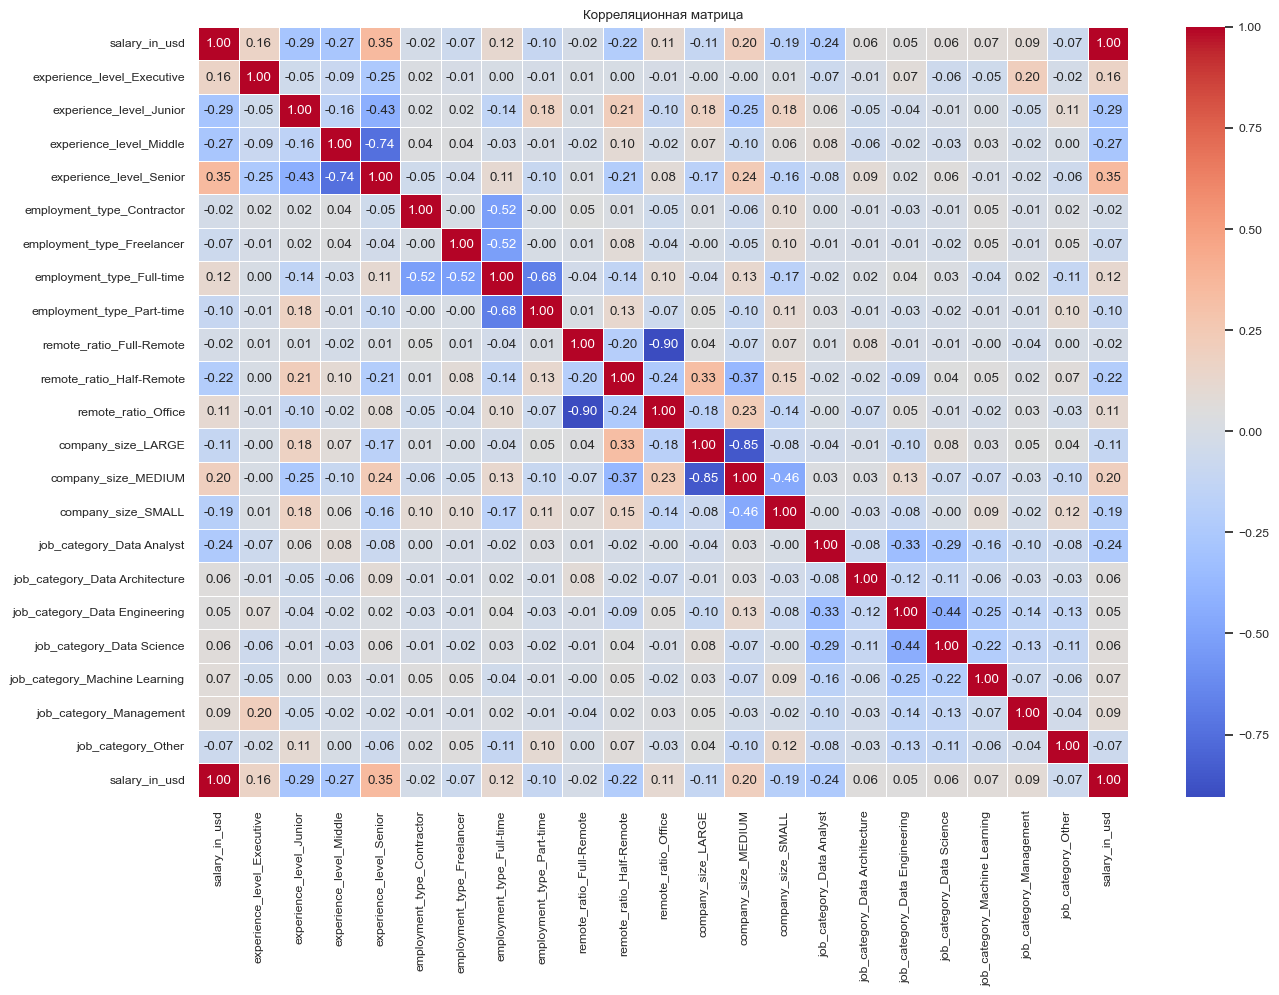

In [68]:
correlation_matrix = processed_df.corr(numeric_only=True)

#Граф I.
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Корреляционная матрица")
plt.show()

corr = processed_df.corr(numeric_only=True)
target_corr = corr['salary_in_usd'].drop('salary_in_usd')